# Problem Set 5: Using Pandas
Follow the instructions below.

### Importing the package

In [2]:
#Import pandas
import pandas as pd

### 1. Loading and exploring the data
► Q1.1 Import the `EleTaiOneWeek.csv` file (located in the data folder) into a pandas dataframe.
  * Modify the code below so that the `CalcID` field is imported as a string 
  * Note how `parse_dates` imports the `StartDate`,`EndDate`, and `Fixtime` fields as date fields

In [3]:
#Load the data as instructed
df = pd.read_csv('../data/EleTaiOneWeek.csv',
                 parse_dates=['StartDate','EndDate','Fixtime']
                )

---
► Q1.2 Display the first 5 records in the dataframe

In [4]:
#Display the "head" (i.e. the first 5 records) of the dataframe
df.head()

,MovDataID,CalcID,StartDate,EndDate,Fixtime,X,Y,Z
0,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 08:14:57,-7.626650,6.242050,NaN
1,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 10:13:55,-7.628533,6.239200,NaN
2,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 11:14:33,-7.628367,6.238933,NaN
3,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 12:14:07,-7.629200,6.237500,NaN
4,Cami,587,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 13:13:56,-7.629800,6.238400,NaN


---
► Q1.3 Display the data types of each column

In [5]:
#Display the data types of each column
df.dtypes

MovDataID            object
CalcID                int64
StartDate    datetime64[ns]
EndDate      datetime64[ns]
Fixtime      datetime64[ns]
X                   float64
Y                   float64
Z                   float64
dtype: object

---
► Q1.4 List each unique value in the `MovDataID` column

In [6]:
#List each unique value in the MovDataID column
df['MovDataID'].unique()

array(['Cami', 'George', 'Frank', 'Yves', 'Tapa', 'Claudine', 'DjeDje',
       'Mahmahdou', 'Blanche', 'Sylvie', 'Zamba', 'Laura', 'Omar', 'Dave',
       'Anika', 'Marie'], dtype=object)

---
► Q1.5 How many unique dates are in the `Fixtime` field?

In [7]:
#Display the number of values in the `Fixtime` column
df['Fixtime'].nunique()

1644

---
### 2. Subsetting data

► Q2.1 Extract values in the `X` column into a variable called `xCoords`

In [13]:
#Extract the X values into a series called xCoords
xCoords = df['X']

0      -7.626650
1      -7.628533
2      -7.628367
3      -7.629200
4      -7.629800
          ...   
2002   -7.866850
2003   -7.866783
2004   -7.861517
2005   -7.855983
2006   -7.860733
Name: X, Length: 2007, dtype: float64

---
► Q2.2 Display the last 10 values in the `Xcoords` series

In [12]:
#Display the last 10 values in the series
xCoords.tail(10)

1997   -7.881133
1998   -7.877033
1999   -7.873417
2000   -7.869183
2001   -7.867383
2002   -7.866850
2003   -7.866783
2004   -7.861517
2005   -7.855983
2006   -7.860733
Name: X, dtype: float64

---
► Q2.3 Create a dataframe of just the `X` and `Y` columns and show the head (first 5 rows) of the dataframe

In [15]:
#Create a dataframe of just the X and Y columns and show the first 5 rows of data
dfXY = df[['X','Y']]
dfXY.head()

,X,Y
0,-7.626650,6.242050
1,-7.628533,6.239200
2,-7.628367,6.238933
3,-7.629200,6.237500
4,-7.629800,6.238400


---
► Q2.4 Create a Boolean mask (`dfGeorgeMask`) for all records where `MovDataID` is "George"

In [18]:
#Create Boolean mask where MovDataID has the value "George"
mask_George = df['MovDataID'] == 'George'

0       False
1       False
2       False
3       False
4       False
        ...  
2002    False
2003    False
2004    False
2005    False
2006    False
Name: MovDataID, Length: 2007, dtype: bool

---
► Q2.5 Select all records where the MovDataID equals "George" into a dataframe called `dfGeorge`
 * *Feel free to use the Boolean mask above or use other techniques.*

In [19]:
#Create a new dataframe of just records where MovDataID is "George"
dfGeorge = df.loc[mask_George]
dfGeorge.head()

,MovDataID,CalcID,StartDate,EndDate,Fixtime,X,Y,Z
139,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 08:12:27,-7.622767,6.205850,NaN
140,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 10:12:33,-7.622517,6.204767,NaN
141,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 11:14:27,-7.622500,6.205317,NaN
142,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 12:12:51,-7.623750,6.207250,NaN
143,George,588,2017-04-09 07:33:40,2017-04-15 16:31:42,2017-04-09 14:12:02,-7.626583,6.208233,NaN


---
### 3. Answering questions with the data
► Q3.1 If the 'Y' column represents latitude, what's the southern most location George has been seen?

In [21]:
#Display the southern most location of the "George" subset
dfGeorge['Y'].min()

6.2032

---
► Q3.2 Somehow demonstrate that George been seen north of 6.23°N **28** times.

In [23]:
mask_northGeorge = dfGeorge['Y'] > 6.23
len(dfGeorge.loc[mask_northGeorge])

28

---
► Q3.3 How many times has George been seen north of 6.23°N *and* west of -7.62°W?

In [25]:
len(dfGeorge.query("Y > 6.23 and X < -7.62"))

18

► Q3.4 What's the *earliest* "Fixtime" date George has been seen 6.23°N and west of -7.62°W?

In [26]:
subset = dfGeorge.query("Y > 6.23 and X < -7.62")
subset['Fixtime'].min()

Timestamp('2017-04-10 04:12:32')

## A cool plot! 
If we set the index of our table to a time column, then plot the XY coordinates, we can visualize the track of our elephant...

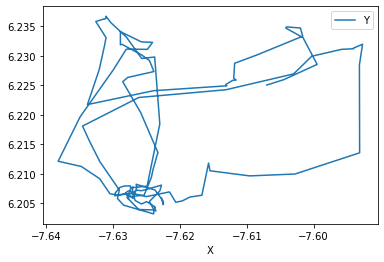

In [27]:
#Plot the path of George!
dfGeorge.set_index('Fixtime').plot(x='X',y='Y');

See if you can to it with another elephant. You'll have to subset the table for a different individual, then repeat the steps above...

<AxesSubplot:xlabel='X'>

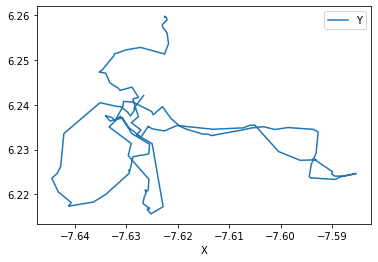

In [28]:
#Plot the path of Cami
mask_Cami = df['MovDataID'] == 'Cami'
dfCami = df.loc[mask_Cami]
dfCami.set_index('Fixtime').plot(x='X',y='Y')

---
### 4. Grouping/aggregating data
► Q4.1 Group the dataframe of all elephants on the `MovDataID` attribute into a "groupBy" object called `grpName`.

In [30]:
grpName = df.groupby('MovDataID')

► Q4.2 List the count of observations for each elephant

In [33]:
grpName.count()

,CalcID,StartDate,EndDate,Fixtime,X,Y,Z
MovDataID,,,,,,,
Anika,35,35,35,35,35,35,0
Blanche,146,146,146,146,146,146,0
Cami,139,139,139,139,139,139,0
Claudine,134,134,134,134,134,134,0
Dave,138,138,138,138,138,138,0
DjeDje,138,138,138,138,138,138,0
Frank,134,134,134,134,134,134,0
George,132,132,132,132,132,132,0
Laura,143,143,143,143,143,143,0


### Demonstrations: Transforming/pivoting data

In [34]:
#Add an "hour" column to the data 
df['Hour'] = df['Fixtime'].dt.hour

Pivot the data such that: 
* Each each unique`MovDataID` value becomes a row
* Each unique `Hour` value becomes a column
* The table shows median X values for each combination of elephant (MovDataID) in each hour

In [35]:
#Pivot data
df.pivot_table(index='MovDataID',
               columns='Hour',
               values=['X'],
               aggfunc='median'
              )

X                                                    \
Hour             0         1         2         3         4         5    
MovDataID                                                               
Anika     -7.897617       NaN       NaN -7.896600 -7.896067       NaN   
Blanche   -7.873325 -7.874200 -7.872225 -7.872725 -7.872808 -7.872725   
Cami      -7.625233 -7.625792 -7.625567 -7.625733 -7.626333 -7.627742   
Claudine  -7.636350 -7.636333 -7.636500 -7.639217 -7.636217 -7.639133   
Dave      -7.648208 -7.649417 -7.652392 -7.654192 -7.656533 -7.658667   
DjeDje    -8.034317 -8.028633 -8.032100 -8.031583 -8.031150 -8.028950   
Frank     -7.703317 -7.704525 -7.707117 -7.710242 -7.712417 -7.716758   
George    -7.627433 -7.627408 -7.624450 -7.623467 -7.623800 -7.624258   
Laura     -7.706492 -7.707325 -7.708017 -7.707950 -7.709250 -7.710033   
Mahmahdou -7.688508 -7.687992 -7.687000 -7.680667 -7.687067 -7.687083   
Marie           NaN -7.837250       NaN       NaN       NaN -7.842942   
Omar      -7.763725 -7.759217 -7.759150 -7.758175 -7.757208 -7.755650   
Sylvie    -7.710508 -7.709667 -7.709908 -7.710908 -7.709883 -7.717433   
Tapa      -7.706525 -7.704850 -7.704500 -7.705083 -7.706183 -7.706283   
Yves      -7.674033 -7.672692 -7.670442 -7.669208 -7.666142 -7.666050   
Zamba     -7.690308 -7.669317 -7.672733 -7.672700 -7.670333 -7.671425   

                                                   ...                      \
Hour             6         7         8         9   ...        14        15   
MovDataID                                          ...                       
Anika           NaN -7.892808 -7.898033       NaN  ...       NaN -7.894158   
Blanche   -7.870625 -7.869883 -7.869617 -7.869833  ... -7.871408 -7.871217   
Cami      -7.625233 -7.622850 -7.626650 -7.625317  ... -7.628600 -7.628717   
Claudine  -7.633033 -7.626092 -7.620417 -7.622208  ... -7.624783 -7.624200   
Dave      -7.666950 -7.663233 -7.668350 -7.669183  ... -7.663300 -7.673433   
DjeDje    -8.028617 -8.026675 -8.026067 -8.025067  ... -8.026633 -8.027283   
Frank     -7.720117 -7.720550 -7.713542 -7.721167  ... -7.705850 -7.705417   
George    -7.623817 -7.625750 -7.623825 -7.624175  ... -7.626533 -7.627217   
Laura     -7.711183 -7.712017 -7.710492 -7.712217  ... -7.709900 -7.710433   
Mahmahdou -7.683033 -7.681133 -7.680867 -7.680100  ... -7.682333 -7.684550   
Marie           NaN       NaN       NaN -7.855983  ...       NaN       NaN   
Omar      -7.749483 -7.753150 -7.744633 -7.744900  ... -7.750683 -7.754083   
Sylvie    -7.719750 -7.740725 -7.758542 -7.757017  ... -7.762383 -7.751367   
Tapa      -7.708500 -7.709692 -7.722442 -7.717800  ... -7.709450 -7.711850   
Yves      -7.666583 -7.666200 -7.665592 -7.665867  ... -7.666800 -7.667250   
Zamba     -7.672283 -7.670083 -7.669433 -7.669667  ... -7.667375 -7.669183   

                                                                       \
Hour             16        17        18        19        20        21   
MovDataID                                                               
Anika     -7.894400       NaN       NaN -7.894667 -7.897067       NaN   
Blanche   -7.870900 -7.871067 -7.871592 -7.872250 -7.872442 -7.872350   
Cami      -7.628100 -7.627267 -7.625750 -7.628342 -7.627500 -7.625625   
Claudine  -7.626700 -7.626200 -7.625958 -7.629417 -7.627683 -7.631425   
Dave      -7.668567 -7.669833 -7.668908 -7.665333 -7.658783 -7.657883   
DjeDje    -8.029933 -8.031025 -8.035433 -8.029550 -8.037425 -8.038933   
Frank     -7.705983 -7.706167 -7.707233 -7.708550 -7.705433 -7.705650   
George    -7.627017 -7.626975 -7.627517 -7.628725 -7.629058 -7.629033   
Laura     -7.709083 -7.708000 -7.708850 -7.708950 -7.707842 -7.706883   
Mahmahdou -7.689100 -7.674658 -7.681967 -7.676200 -7.682325 -7.684667   
Marie           NaN -7.835325       NaN       NaN       NaN -7.839717   
Omar      -7.752433 -7.759458 -7.751358 -7.751717 -7.754675 -7.757192   
Sylvie    -7.749125 -7.743583 -7.733983 -7.726808 -7